In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
phones=pd.read_csv("mobiles.csv")

In [3]:
phones

,Unnamed: 0,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,0,realme,Champion Gold,64.0,4.6,6.74,5000.0,"₹10,999"
1,1,realme,Champion Black,64.0,NaN,6.74,5000.0,"₹10,999"
2,2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,"₹13,999"
3,3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,"₹13,999"
4,4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,"₹15,999"
...,...,...,...,...,...,...,...,...
955,955,SAMSUNG,Prism Silver,128.0,NaN,6.50,6000.0,"₹19,900"
956,956,OPPO,Sunset Orange,64.0,NaN,6.56,5000.0,"₹14,980"
957,957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,"₹35,499"
958,958,APPLE,Starlight,512.0,4.7,6.10,NaN,"₹89,999"


In [6]:
phones.shape

(960, 8)

In [4]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   960 non-null    int64  
 1   Brand        960 non-null    object 
 2   Color        931 non-null    object 
 3   Storage      958 non-null    float64
 4   Rating       940 non-null    float64
 5   Screen_size  957 non-null    float64
 6   Battery      901 non-null    float64
 7   Price        960 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 60.1+ KB


In [7]:
phones.head()

,Unnamed: 0,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,0,realme,Champion Gold,64.0,4.6,6.74,5000.0,"₹10,999"
1,1,realme,Champion Black,64.0,NaN,6.74,5000.0,"₹10,999"
2,2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,"₹13,999"
3,3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,"₹13,999"
4,4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,"₹15,999"


In [12]:
phones=phones.drop("Unnamed: 0",axis=1)

In [13]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64.0,4.6,6.74,5000.0,"₹10,999"
1,realme,Champion Black,64.0,NaN,6.74,5000.0,"₹10,999"
2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,"₹13,999"
3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,"₹13,999"
4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,"₹15,999"
...,...,...,...,...,...,...,...
955,SAMSUNG,Prism Silver,128.0,NaN,6.50,6000.0,"₹19,900"
956,OPPO,Sunset Orange,64.0,NaN,6.56,5000.0,"₹14,980"
957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,"₹35,499"
958,APPLE,Starlight,512.0,4.7,6.10,NaN,"₹89,999"


In [16]:
phones["Price"]=phones["Price"].replace("[^\d+]","",regex=True).astype("int")

In [17]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        960 non-null    object 
 1   Color        931 non-null    object 
 2   Storage      958 non-null    float64
 3   Rating       940 non-null    float64
 4   Screen_size  957 non-null    float64
 5   Battery      901 non-null    float64
 6   Price        960 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 48.9+ KB


In [19]:
phones["Storage"]=phones["Storage"].astype("int",errors="ignore")

In [20]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        960 non-null    object 
 1   Color        931 non-null    object 
 2   Storage      958 non-null    float64
 3   Rating       940 non-null    float64
 4   Screen_size  957 non-null    float64
 5   Battery      901 non-null    float64
 6   Price        960 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 48.9+ KB


In [21]:
phones.isnull().sum()

Brand           0
Color          29
Storage         2
Rating         20
Screen_size     3
Battery        59
Price           0
dtype: int64

In [23]:
phones[phones["Color"].isna()]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
47,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,14990
69,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,14990
136,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,17890
163,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,13990
169,REDMI,NaN,128.0,4.1,6.71,5000.0,10220
191,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,13990
193,REDMI,NaN,128.0,4.1,6.71,5000.0,10220
210,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,16990
273,APPLE,NaN,64.0,4.3,4.70,NaN,32699
386,Tecno,NaN,128.0,NaN,6.60,5000.0,11699


In [24]:
phones["Color"].unique()

array(['Champion Gold', 'Champion Black', 'Marine Blue', 'Glimmer Black',
       'Aurora Gold', 'Atlantic Green', 'Blue Tide', 'Mineral Gray',
       'Waterfall Blue', 'Power Black', 'Midnight', 'Frosted Blue',
       'Light Green', 'Dark Blue', 'Jaguar Black', 'Cool Blue',
       'Peppy Purple', 'Yellow', 'Nitro Blaze', 'Velocity Wave',
       'GOAT Green', 'Black Dusk', 'Flashy Black', 'Purple',
       'Midnight Gray', 'Aqua Blue', 'Starlight', 'Sunrise Copper',
       'Copper Blush', 'Forest Green', 'Nebula Green', 'Nightsky Green',
       'Playful Green', 'Midnight Blue', 'Wildcat Blue', nan,
       'Rainforest', 'Lucent White', 'Rainy Night', 'Sunshower',
       'Astral Black', 'Dark Matter', 'OMG Black', 'Horizon Blue',
       'Aurora Blue', 'Supernova Green', 'Stellar Green', 'Sunset Gold',
       'Hyperspace', 'Nebula Blue', 'Lunar Black', 'Frosted Green',
       'Interstellar Blue', 'Prime Black', 'Matte Black', 'Prime Blue',
       'Blue', 'Sunrise Gold', 'Mystique Blue', 'Fe

In [25]:
phones["Color"].nunique()

348

In [26]:
phones["Color"].value_counts()

Black               20
Blue                12
Yellow              12
Midnight Blue       12
White               11
                    ..
Pearl Blue           1
Hazel                1
Aquamarine Green     1
Cosmic Purple        1
Mars Orange          1
Name: Color, Length: 348, dtype: int64

In [27]:
phones.groupby("Brand")

In [30]:
for i in phones.groupby("Brand")["Color"]:
    print(i)

('APPLE', 16        Midnight
32          Purple
36       Starlight
71        Midnight
95            Blue
101       Midnight
110      Starlight
126          Green
158           Blue
168           Pink
178      Starlight
218       Midnight
224         Yellow
273            NaN
291      Starlight
296          White
321          Black
328          White
336          Black
345      Starlight
362       Midnight
373      Starlight
375       Midnight
401       Midnight
405       Midnight
413           Blue
455         Yellow
458            NaN
487            NaN
496         Yellow
502      Starlight
514            NaN
523       Midnight
543         Purple
550           Blue
572           Blue
575           Gold
624         Silver
628    Space Black
645    Space Black
674          Green
685         Silver
696         Silver
700          White
723    Deep Purple
729            Red
741       Midnight
745      Starlight
752         Purple
756       Midnight
762          Green
794         Yellow
83

In [37]:
phones["Color"]=phones.groupby("Brand")["Color"].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [38]:
phones.isnull().sum()

Brand           0
Color           0
Storage         2
Rating         20
Screen_size     3
Battery        59
Price           0
dtype: int64

In [39]:
phones.groupby("Brand")["Color"].transform(lambda x:x.fillna(x.mode().iloc[0]))

0       Champion Gold
1      Champion Black
2         Marine Blue
3       Glimmer Black
4         Marine Blue
            ...      
955      Prism Silver
956     Sunset Orange
957      Forest Green
958         Starlight
959       Mars Orange
Name: Color, Length: 960, dtype: object

<AxesSubplot:ylabel='Frequency'>

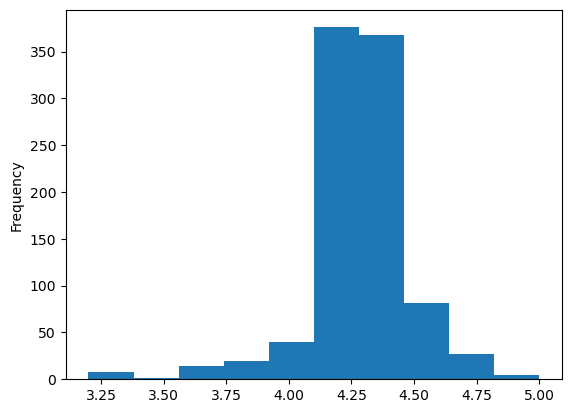

In [41]:
phones["Rating"].plot(kind="hist")

<AxesSubplot:>

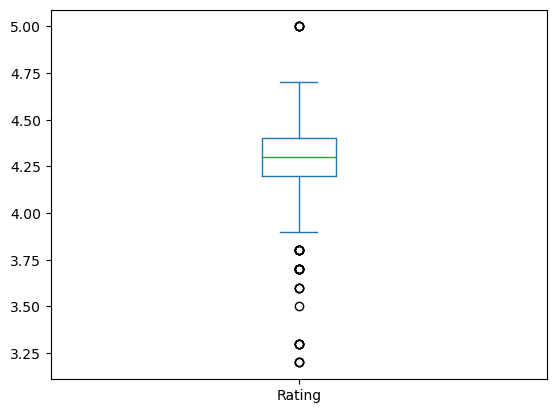

In [42]:
phones["Rating"].plot(kind="box")

In [44]:
phones["Rating"].mean()

4.259680851063824

In [46]:
phones["Rating"].median()

4.3

In [48]:
phones["Rating"].fillna(phones["Rating"].median(),inplace=True)

In [49]:
phones.isnull().sum()

Brand           0
Color           0
Storage         2
Rating          0
Screen_size     3
Battery        59
Price           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

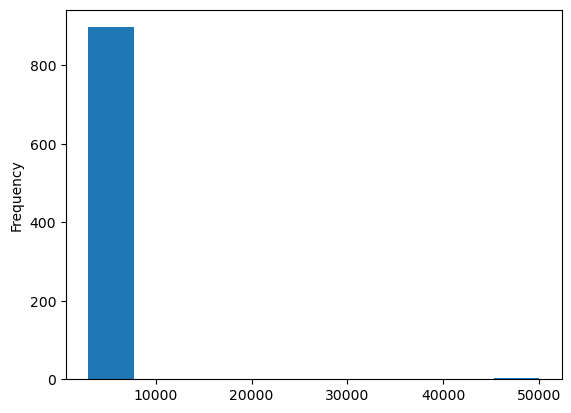

In [51]:
phones["Battery"].plot(kind="hist")

<AxesSubplot:>

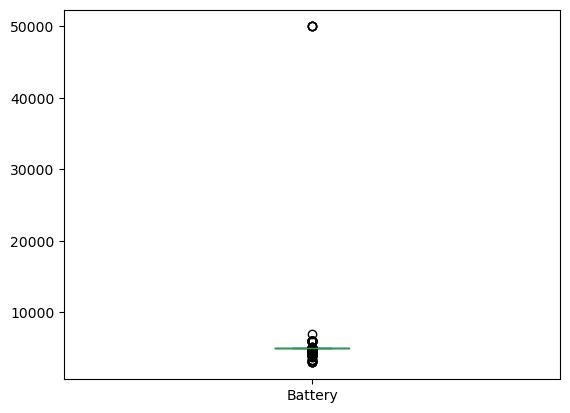

In [52]:
phones["Battery"].plot(kind="box")

In [57]:
phones["Battery"]

0      5000.0
1      5000.0
2      5000.0
3      5000.0
4      5000.0
        ...  
955    6000.0
956    5000.0
957    5000.0
958       NaN
959    5000.0
Name: Battery, Length: 960, dtype: float64

In [56]:
phones[phones["Battery"]<10000]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64.0,4.6,6.74,5000.0,10999
1,realme,Champion Black,64.0,4.3,6.74,5000.0,10999
2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,13999
3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,13999
4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,15999
...,...,...,...,...,...,...,...
954,realme,Drifting White,128.0,4.3,6.62,5000.0,36999
955,SAMSUNG,Prism Silver,128.0,4.3,6.50,6000.0,19900
956,OPPO,Sunset Orange,64.0,4.3,6.56,5000.0,14980
957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,35499


In [59]:
phones["Battery"]=phones["Battery"].replace(50000.0,5000.0)

<AxesSubplot:ylabel='Frequency'>

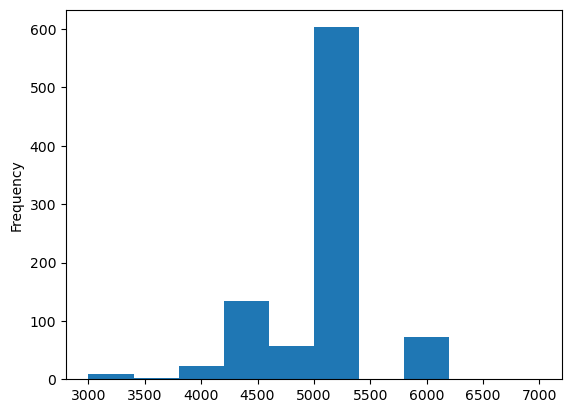

In [60]:
phones["Battery"].plot(kind="hist")

<AxesSubplot:>

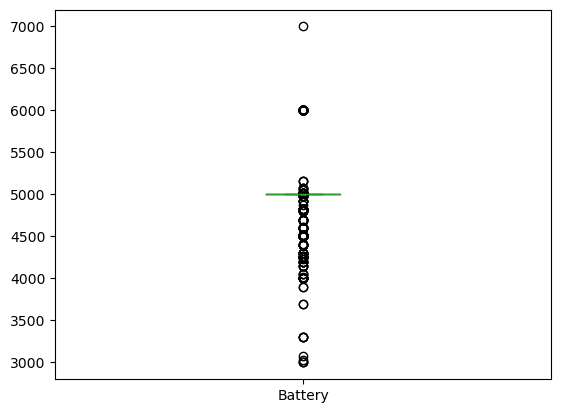

In [61]:
phones["Battery"].plot(kind="box")

In [62]:
phones[phones["Battery"]==5000.0]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64.0,4.6,6.74,5000.0,10999
1,realme,Champion Black,64.0,4.3,6.74,5000.0,10999
2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,13999
3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,13999
4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,15999
...,...,...,...,...,...,...,...
953,SAMSUNG,Copper,64.0,4.1,6.50,5000.0,11399
954,realme,Drifting White,128.0,4.3,6.62,5000.0,36999
956,OPPO,Sunset Orange,64.0,4.3,6.56,5000.0,14980
957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,35499


In [63]:
phones["Battery"].mean()

4941.798002219756

In [64]:
phones["Battery"].mode()

0    5000.0
Name: Battery, dtype: float64

In [65]:
phones.groupby("Brand")

In [66]:
phones[phones["Battery"].isna()]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
16,APPLE,Midnight,128.0,4.6,6.1,NaN,68999
32,APPLE,Purple,128.0,4.6,6.1,NaN,68999
36,APPLE,Starlight,128.0,4.6,6.1,NaN,68999
71,APPLE,Midnight,128.0,4.7,6.1,NaN,59999
95,APPLE,Blue,128.0,4.6,6.1,NaN,68999
101,APPLE,Midnight,128.0,4.7,6.1,NaN,59999
110,APPLE,Starlight,128.0,4.7,6.1,NaN,59999
126,APPLE,Green,128.0,4.7,6.1,NaN,59999
158,APPLE,Blue,128.0,4.7,6.1,NaN,59999
168,APPLE,Pink,128.0,4.7,6.1,NaN,59999


In [67]:
phones[phones["Battery"].isna()]["Price"].value_counts()

59999     6
78999     6
68999     5
76999     5
53999     5
69999     4
127999    4
46599     3
32699     3
44999     2
41999     2
37999     2
120999    2
98999     2
89999     2
40999     1
130999    1
86999     1
106999    1
137999    1
40990     1
Name: Price, dtype: int64

In [68]:
phones["Battery"]=phones["Battery"].fillna(phones["Battery"].median())

In [69]:
phones.isnull().sum()

Brand          0
Color          0
Storage        2
Rating         0
Screen_size    3
Battery        0
Price          0
dtype: int64

In [75]:
phones=phones.dropna(subset=["Storage","Screen_size"])

In [77]:
phones.isnull().sum()

Brand          0
Color          0
Storage        0
Rating         0
Screen_size    0
Battery        0
Price          0
dtype: int64

In [78]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        955 non-null    object 
 1   Color        955 non-null    object 
 2   Storage      955 non-null    float64
 3   Rating       955 non-null    float64
 4   Screen_size  955 non-null    float64
 5   Battery      955 non-null    float64
 6   Price        955 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 56.0+ KB


In [79]:
phones["Battery"]=phones["Battery"].astype("int")

C:\Users\HP\AppData\Local\Temp\ipykernel_14740\3494300282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Battery"]=phones["Battery"].astype("int")


In [80]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        955 non-null    object 
 1   Color        955 non-null    object 
 2   Storage      955 non-null    float64
 3   Rating       955 non-null    float64
 4   Screen_size  955 non-null    float64
 5   Battery      955 non-null    int32  
 6   Price        955 non-null    int32  
dtypes: float64(3), int32(2), object(2)
memory usage: 52.2+ KB


In [81]:
phones["Storage"]=phones["Storage"].astype("int")

C:\Users\HP\AppData\Local\Temp\ipykernel_14740\1561665769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Storage"]=phones["Storage"].astype("int")


In [82]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        955 non-null    object 
 1   Color        955 non-null    object 
 2   Storage      955 non-null    int32  
 3   Rating       955 non-null    float64
 4   Screen_size  955 non-null    float64
 5   Battery      955 non-null    int32  
 6   Price        955 non-null    int32  
dtypes: float64(2), int32(3), object(2)
memory usage: 48.5+ KB


In [83]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64,4.6,6.74,5000,10999
1,realme,Champion Black,64,4.3,6.74,5000,10999
2,vivo,Marine Blue,128,4.4,6.58,5000,13999
3,vivo,Glimmer Black,128,4.4,6.58,5000,13999
4,vivo,Marine Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Prism Silver,128,4.3,6.50,6000,19900
956,OPPO,Sunset Orange,64,4.3,6.56,5000,14980
957,OnePlus,Forest Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [84]:
phone["Color"].nunique()

348

In [85]:
phones["Color"]

0       Champion Gold
1      Champion Black
2         Marine Blue
3       Glimmer Black
4         Marine Blue
            ...      
955      Prism Silver
956     Sunset Orange
957      Forest Green
958         Starlight
959       Mars Orange
Name: Color, Length: 955, dtype: object

In [92]:
color=[]
for i in phones["Color"]:
    color.append(i.split()[-1])

In [94]:
phones["Color"]=color

C:\Users\HP\AppData\Local\Temp\ipykernel_14740\1520882060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Color"]=color


In [95]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Gold,64,4.6,6.74,5000,10999
1,realme,Black,64,4.3,6.74,5000,10999
2,vivo,Blue,128,4.4,6.58,5000,13999
3,vivo,Black,128,4.4,6.58,5000,13999
4,vivo,Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900
956,OPPO,Orange,64,4.3,6.56,5000,14980
957,OnePlus,Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [96]:
phones["Color"].nunique()

81

In [99]:
S1=pd.Series(["10k","256k","1M","50k","15M"])

In [100]:
S1

0     10k
1    256k
2      1M
3     50k
4     15M
dtype: object

In [102]:
S1.replace({"k":"000","M":"000000"},regex=True).astype("int")

0       10000
1      256000
2     1000000
3       50000
4    15000000
dtype: int32